In [1]:
# Plotly to explore one mooring prior to finalizing

In [15]:
import plotly.express as px
import plotly.graph_objects as go

In [16]:
import pandas as pd
import xarray as xr
import datetime
import glob

In [58]:
pandas = False

if pandas:
    files = glob.glob('../../moorings/2024/24ckp2a/*.csv')

    tdf = pd.DataFrame()
    for file in files:
        df = pd.read_csv(file)
        df['timeseries_id'] = file.split('/')[-1].split('.csv')[0]
    
        tdf = pd.concat([tdf,df],axis=0)
if not pandas:
    files = glob.glob('../../moorings/2024/24ckp3a/*.nc')
    # files = glob.glob('/Users/bell/ecoraid/2025/Moorings/25bs2a/final_data_cf/*.nc')
    tdf = pd.DataFrame()
    for file in files:
        xdf = xr.load_dataset(file)
        df = xdf.to_dataframe()
        df['timeseries_id'] = file.split('/')[-1].split('.nc')[0]
    
        tdf = pd.concat([tdf,df],axis=0)

In [59]:
tdf.sample(4)

temperature  salinity      par  \
time                depth latitude longitude                                   
2024-10-20 05:00:00 44.0  71.831   -166.0145       0.2370       NaN      NaN   
2024-11-09 08:00:00 44.0  71.831   -166.0145       0.1460       NaN      NaN   
2024-12-13 07:00:00 38.0  71.831   -166.0145      -1.7088   31.3011  0.03462   
2025-07-23 07:00:00 38.0  71.831   -166.0145      -1.6472   32.5643  0.15726   

                                                    timeseries_id  oxy_concM  \
time                depth latitude longitude                                   
2024-10-20 05:00:00 44.0  71.831   -166.0145  24ckp3a_rcmsg_0040m    252.334   
2024-11-09 08:00:00 44.0  71.831   -166.0145  24ckp3a_rcmsg_0040m    282.229   
2024-12-13 07:00:00 38.0  71.831   -166.0145    24ckp3a_s16_0038m        NaN   
2025-07-23 07:00:00 38.0  71.831   -166.0145    24ckp3a_s16_0038m        NaN   

                                              oxy_percentsat  oxy_temperature  \
time                depth latitude longitude                                    
2024-10-20 05:00:00 44.0  71.831   -166.0145          55.678            0.267   
2024-11-09 08:00:00 44.0  71.831   -166.0145          62.109            0.172   
2024-12-13 07:00:00 38.0  71.831   -166.0145             NaN              NaN   
2025-07-23 07:00:00 38.0  71.831   -166.0145             NaN              NaN   

                                              current_speed  v_curr_comp  \
time                depth latitude longitude                               
2024-10-20 05:00:00 44.0  71.831   -166.0145         13.195    12.797801   
2024-11-09 08:00:00 44.0  71.831   -166.0145          3.935    -3.336000   
2024-12-13 07:00:00 38.0  71.831   -166.0145            NaN          NaN   
2025-07-23 07:00:00 38.0  71.831   -166.0145            NaN          NaN   

                                              u_curr_comp  conductivity  
time                depth latitude longitude                             
2024-10-20 05:00:00 44.0  71.831   -166.0145    -3.212735           NaN  
2024-11-09 08:00:00 44.0  71.831   -166.0145    -2.087385           NaN  
2024-12-13 07:00:00 38.0  71.831   -166.0145          NaN           NaN  
2025-07-23 07:00:00 38.0  71.831   -166.0145          NaN           NaN

In [60]:
tdf = tdf.reset_index().sort_values(['depth','time'])
tdf.sample(4)

time  depth  latitude  longitude  temperature  salinity  \
18561 2024-09-24 03:00:00   39.0    71.831  -166.0145       0.7993   31.6886   
21658 2025-01-31 04:00:00   39.0    71.831  -166.0145      -1.7787   32.5925   
8917  2024-08-21 07:00:00   44.0    71.831  -166.0145       0.9660       NaN   
5858  2025-04-18 20:00:00   38.0    71.831  -166.0145      -1.8102   33.2836   

           par        timeseries_id  oxy_concM  oxy_percentsat  \
18561      NaN    24ckp3a_s37_0039m        NaN             NaN   
21658      NaN    24ckp3a_s37_0039m        NaN             NaN   
8917       NaN  24ckp3a_rcmsg_0040m    334.378          75.263   
5858   0.25722    24ckp3a_s16_0038m        NaN             NaN   

       oxy_temperature  current_speed  v_curr_comp  u_curr_comp  conductivity  
18561              NaN            NaN          NaN          NaN       2.71847  
21658              NaN            NaN          NaN          NaN       2.58134  
8917             0.977          6.947     4.782473     5.038851           NaN  
5858               NaN            NaN          NaN          NaN           NaN

In [61]:
len(tdf.timeseries_id.unique())

3

In [62]:
n_colors=len(tdf.timeseries_id.unique())
colors = px.colors.sample_colorscale("viridis", n_colors)

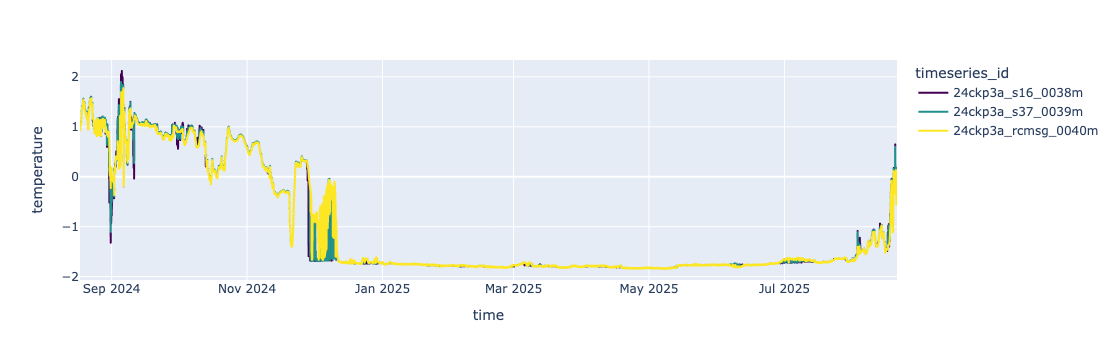

In [63]:
px.line(tdf.dropna(subset='temperature',how='all'),
        x='time',
        y='temperature',
        color='timeseries_id', 
        color_discrete_sequence=colors)

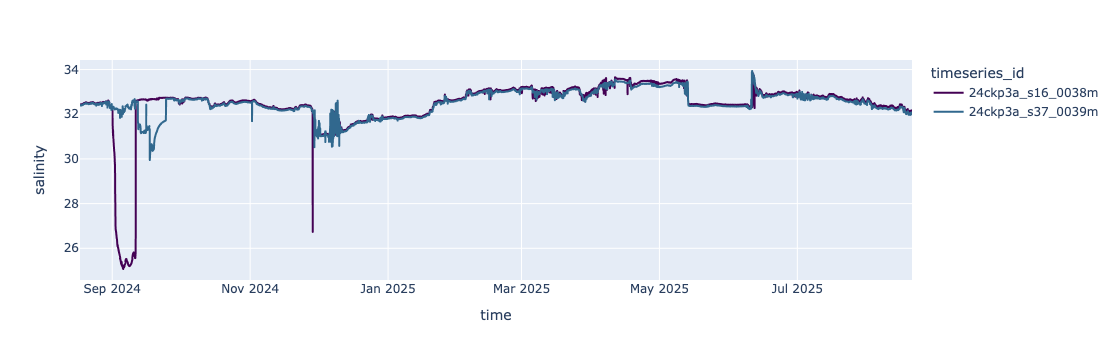

In [64]:
colors = px.colors.sample_colorscale("viridis", 4)

px.line(tdf.dropna(subset='salinity',how='all'),
        x='time',
        y='salinity',
        color='timeseries_id', 
        color_discrete_sequence=colors)

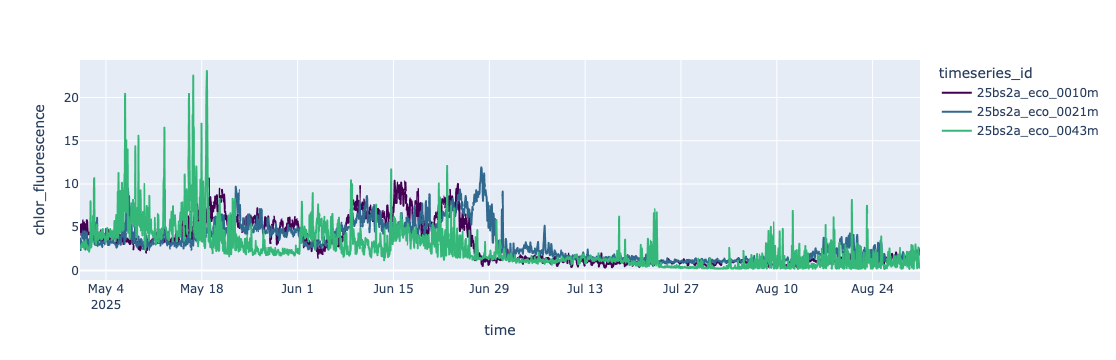

In [50]:
colors = px.colors.sample_colorscale("viridis", 4)

px.line(tdf.dropna(subset='chlor_fluorescence',how='all'),
        x='time',
        y='chlor_fluorescence',
        color='timeseries_id',
        color_discrete_sequence=colors)

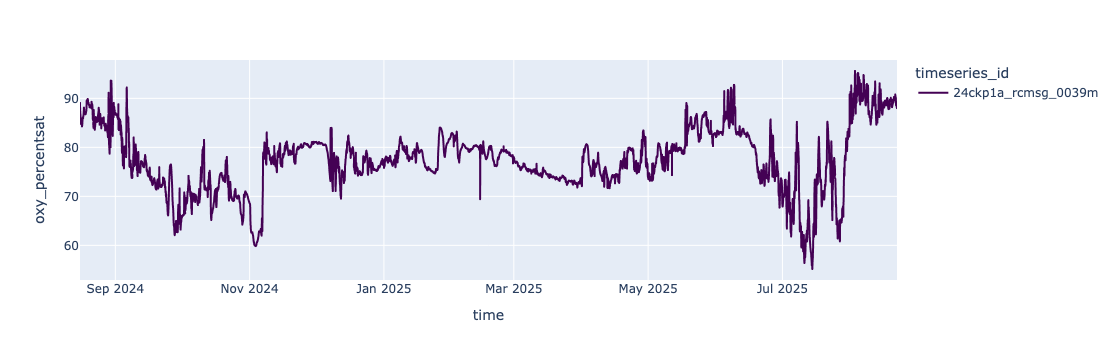

In [40]:
colors = px.colors.sample_colorscale("viridis", 4)

px.line(tdf.dropna(subset='oxy_percentsat',how='all'),
        x='time',
        y='oxy_percentsat',
        color='timeseries_id',
        color_discrete_sequence=colors)

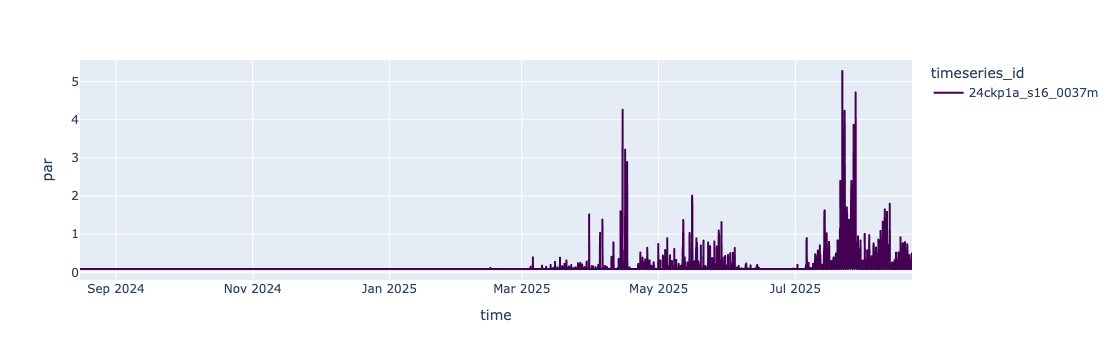

In [41]:
colors = px.colors.sample_colorscale("viridis", 4)

px.line(tdf.dropna(subset='par',how='all'),
        x='time',
        y='par',
        color='timeseries_id',
        color_discrete_sequence=colors)

In [42]:
# file/var output
output = False

if output:
    
    tdf[['time','depth','latitude','longitude','temperature','timeseries_id']].dropna(subset='temperature',how='all').to_csv('24bs8a.temperature.csv')
    tdf[['time','depth','latitude','longitude','salinity','timeseries_id']].dropna(subset='salinity',how='all').to_csv('24bs8a.salinity.csv')
    
    vname = 'salinity'
    with pd.ExcelWriter(f'24bs8a_{vname}.xlsx') as writer:  
    
        for depthkey in tdf.groupby('depth').groups.keys():
            if not (tdf.groupby('depth').get_group(depthkey).dropna(how='all'))[vname].empty:
                try:
                    print(f'saving {depthkey}')
                    (tdf.groupby('depth').get_group(depthkey).dropna(how='all',axis=1))[['time',vname,'timeseries_id']].to_excel(writer, sheet_name=str(depthkey))
                except:
                    pass
    
    tdf.groupby('depth').get_group(depthkey).dropna(how='all',axis=1)